In [520]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
import json
from math import atan2
from numpy.linalg import norm
%matplotlib inline

In [612]:
def pvec(vec, color='b', label=None):
    vec = np.array(vec)
    plt.arrow(0, 0, vec[0],vec[1], width=0.01, color=color, label=label)

def non_negative_angle(angle: float) -> float:
    if angle > 0:
        return angle
    return 2*np.pi + angle
    
def inner_angle(v1, v2=None):
    angle1 = non_negative_angle(math.atan2(v1[1], v1[0]))
    if v2 is None:
        return angle1
    angle2 = non_negative_angle(math.atan2(v2[1], v2[0]))
    return max(angle1, angle2) - min(angle1, angle2)

def v1_right_to_v2(v1, v2):
    cross_product = np.cross(v2, v1)
    return cross_product > 0

ar = lambda *vec: np.array(vec)



def normal_vector(v1, v2):
    v2 - v1@v2
    v1 = np.array(v1)
    v2 = np.array(v2)
    v3 = np.array([-v1[1], v1[0]])  # create a vector perpendicular to v2
    dot = np.dot(v2, v3)
    if dot > 0:
        v3 = -v3  # flip the vector if it points in the wrong direction
    return v3


def angle_to_normal(v1, v2):
    n = normal_vector(v1, v2)
    angle = vangle(v2, n)
    if np.cross(v2, v1) > 0:
        if angle < 0:
            return 2*np.pi + angle
        return  angle
    
    if angle > 0:
        return angle - 2*np.pi
    return angle


In [511]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def plot_arc(start_angle, end_angle, radius=0.5, center=(0, 0), **kwargs):
    fig, ax = plt.subplots()
    radius = 0.5
    if start_angle > end_angle:
        arc= Arc((0,0), radius*2, radius*2, angle=0, theta1=end_angle, theta2=start_angle)
    else:
        arc= Arc((0,0), radius*2, radius*2, angle=0, theta1=start_angle, theta2=end_angle)
    ax.add_patch(arc)

def rotate_vector(v, theta):
    theta = np.radians(theta)  # convert degrees to radians
    c = np.cos(theta)
    s = np.sin(theta)
    rotation_matrix = np.array([[c, -s], [s, c]])
    return np.dot(rotation_matrix, v)



In [570]:
def angle_between_vectors(a, b):
    cos_theta = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    theta = np.arccos(cos_theta)
    return theta*180/np.pi



179.0


<Figure size 360x288 with 0 Axes>

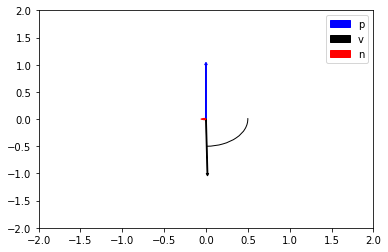

In [673]:
def non_negative_angle(angle: float) -> float:
    if angle > 0:
        return angle
    return 2*np.pi + angle

def inan(v1, v2=None):
    angle1 = non_negative_angle(math.atan2(v1[1], v1[0]))
    if v2 is None:
        return angle1
    angle2 = non_negative_angle(math.atan2(v2[1], v2[0]))
    angle = max(angle1, angle2) - min(angle1, angle2)
    print()
    if angle < np.pi:
        return angle
    return 2*np.pi - angle


plt.figure().set_figwidth(5)

p = ar(1,0)
v= ar(1,0)
a = 90
p = rotate_vector(p, a)
v = rotate_vector(v, a+181)

print(inan(v, p)*180/np.pi)

phat = p/norm(p)
vhat = v/norm(v)
n = normal_vector(p, v)
n = -vector_from_line_to_point(p, v)




theta1 = vangle(v)*180/np.pi
theta2 = theta1 +angle_to_normal(p, v)*180/np.pi
plot_arc(theta1, theta2)
pvec(p, 'b', "p")
pvec(v, 'k', "v")
pvec(n, "r" ,"n")
plt.legend()


# print(vangle(p, v)*180/np.pi)

plt.xlim([-2,2])
plt.ylim([-2,2])

inners = []
# for i in range(361):
#     for j in range(1, 179):
#         p = ar(1,0)
#         v= ar(1,0)
#         p = rotate_vector(p, i)
#         v = rotate_vector(v, i-j)
#         inners.append(inner(v, p))


False

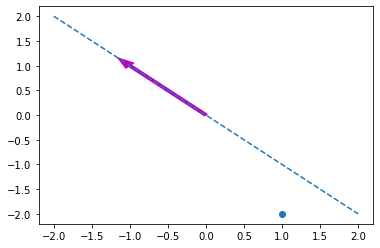

In [683]:
def plot_line(p1,p2,x_scale):
    p1 = np.array(p1)
    p2 = np.array(p2)
    p = p2-p1
    x_min = x_scale[0]
    x_max = x_scale[1]
    x = np.linspace(x_min, x_max)
    if p1[1]-p2[1] != 0:
        m = (p1[1]-p2[1])/(p1[0]-p2[0])
        y = m*(x-p1[0])+p1[1]
        plt.plot(x,y, '--')
    else:
        y = np.ones(len(x))*p1[1]
        plt.plot(x,y, '--')
        

def clock_wise_angle(p1, p2, point):
    p = p2-p1
    n = np.array([-p[1],p[0]])
    n_hat = n/norm(n)
    return point@n_hat < 0

def plot_vec(vec, point=np.array([0,0]),color='m', width=0.05):
    point = np.array(point)
    vec = np.array(vec)
    projection = point+vec
    plt.arrow(point[0], point[1], projection[0] - point[0], projection[1] - point[1], width=width, color=color, label='Vector')

    
point = ar(1,-2)
p1 = ar(0,0)
p2 =  ar(-1,1)
p = p2-p1
plot_line(p1,p2, [-2,2])
plt.scatter(point[0], point[1])
plot_vec(p, p1)
point_abouve_line(p1, p2, point)

In [ ]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline
#hyper parameters
dt = 1
learning_rate = 0.1

#initial parameters
initial_velocity = 0.5
initial_theta = 0
initial_pos = np.array([0,-2])
p1 = np.array([0,0])
p2 = np.array([1,11])
line = np.array([p1, p2])
p = p2-p1
pvec(p, "r")
plt.scatter(initial_pos[0], initial_pos[1])
car = Car(initial_pos, initial_theta, initial_velocity)

plot_line(p1, p2, [-1,1])
car_path = [initial_pos]

for t in range(20):
    theta = car.get_direction()
    velocity = car.velocity
    v_hat = np.array([np.cos(theta), np.sin(theta)])
    v = velocity*v_hat

    d = abs(line_point_distance(p1, p2, car.position))
    n = normal_from_other_side(p, car.position)
    d_theta = distance_controller(car.position, v, line)
    w = 5
    proportional = (w*d/(w*d+1))
    new_theta =theta + d_theta* proportional
#     print(f'v right to p {v1_right_to_v2(v, p)}')
#     print(f'v right to n {v1_right_to_v2(v, n)}')
#     print(f'final theta {int(d_theta*180/np.pi)}')
#     print(f'is_clock_wise_angle {is_clock_wise_angle(line[0], line[1],  car.position)}')
    
    
    
    n = n/norm(n)/2
#     plot_vec(n, car.position, width=0.01)
#     plot_vec(v/norm(v)*0.15, car.position, color='b', width=0.01)
#     angle = vangle(v, n)
#     plot_arc(theta*180/np.pi, (theta +1*distance_controller(car.position, v, line))*180/np.pi ,center=car.position, radius=0.2)
    
    
    car.set_direction(new_theta)
    car.update_position(dt)
    car_path.append(car.position)
    
    
    
#     theta = car.get_direction()
#     velocity = car.velocity
#     v_hat = np.array([np.cos(theta), np.sin(theta)])
#     v = velocity*v_hat
#     n = vector_from_line_to_point(p, car.position)

    
car_path  =np.array(car_path)
plt.plot(car_path[:,0], car_path[:,1])
